<a href="https://colab.research.google.com/github/KshitijShinde/Basics-Of-Machine-Learning/blob/main/9_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of principal components selected: 10
Explained variance ratio of each selected component: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019]
Total explained variance: 0.9616971684450643


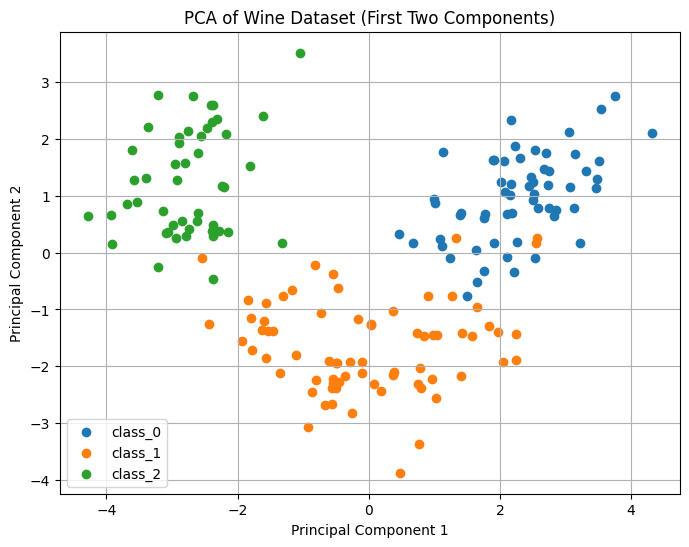

In [2]:
# PCA on Wine Dataset with 95% Variance Retention

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Load Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to keep 95% of variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Show how many components were selected
print("Number of principal components selected:", pca.n_components_)
print("Explained variance ratio of each selected component:", pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))

# (Optional) If you want, you can plot first two PCs for visualization
if X_pca.shape[1] >= 2:
    df_pca = pd.DataFrame(data=X_pca[:, :2], columns=['PC1', 'PC2'])
    df_pca['target'] = y

    plt.figure(figsize=(8,6))
    for target in set(y):
        subset = df_pca[df_pca['target'] == target]
        plt.scatter(subset['PC1'], subset['PC2'], label=wine.target_names[target])

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of Wine Dataset (First Two Components)')
    plt.legend()
    plt.grid(True)
    plt.show()
